In this notebook, we are going to develop a simple CNN for the categorization of images using the CIFAR-10 dataset. This project is part of the assignments of the Neural Networks and Deep Learning Tutorial (found [here](https://www.udemy.com/deep-learning-com-python-az-curso-completo/learn/practice/1043276/introduction#overview))

# Libraries

In [0]:
#Basic imports
import matplotlib.pyplot as plt

#SkLearn imports


#Keras imports
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.layers.normalization import BatchNormalization

# Data Acquisition

In [0]:
#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


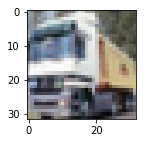

In [0]:
#Print single image
plt.figure(figsize = (2,2))
plt.imshow(x_train[1])

In [0]:
#Normalize features
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
#Encode target
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
x_train.shape

(50000, 32, 32, 3)

# Classification model

## Create CNN model

In [0]:
#Define CNN as function
def create_model(n_pre, n_filters, input_dim, n_dense, n_nodes, drop, n_out):
  model = Sequential()
  
  #Preprocessing layers
  for i in range(n_pre):
    if i == 0:
      model.add(Conv2D(filters = n_filters, 
                kernel_size = (3,3), 
                strides = (1,1),
                input_shape = (input_dim[0],input_dim[1],input_dim[2]),
                activation = 'relu'))
    else:
      model.add(Conv2D(filters = n_filters, 
                kernel_size = (3,3), 
                strides = (1,1),
                activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  
  #Dense layers
  for i in range(n_dense - 1):
    model.add(Dense(units = n_nodes, activation = 'relu'))
    model.add(Dropout(drop))
  model.add(Dense(units = n_out, activation = 'softmax'))
  
  #Compilation
  model.compile(loss = 'categorical_crossentropy', 
                optimizer = 'adam',
                metrics = ['accuracy'])
  
  return model
  

In [0]:
#Create model instance
model = create_model(n_pre = 2,
                     n_filters = 64,
                     input_dim = x_train.shape[1:],
                     n_dense = 2,
                     n_nodes = 256,
                     drop = 0.3,
                     n_out = 10)

## Train model

In [0]:
model.fit(x = x_train,
          y = y_train,
          epochs = 50,
          batch_size = 128,
          validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 246us/step - loss: 0.5300 - acc: 0.8137 - val_loss: 1.0221 - val_acc: 0.6659
Epoch 2/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.4519 - acc: 0.8397 - val_loss: 0.9069 - val_acc: 0.7253
Epoch 3/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.3859 - acc: 0.8642 - val_loss: 0.9699 - val_acc: 0.7234
Epoch 4/50
50000/50000 [==============================] - 12s 233us/step - loss: 0.3378 - acc: 0.8826 - val_loss: 0.8706 - val_acc: 0.7258
Epoch 5/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.2876 - acc: 0.8994 - val_loss: 1.0294 - val_acc: 0.6935
Epoch 6/50
50000/50000 [==============================] - 12s 234us/step - loss: 0.2571 - acc: 0.9089 - val_loss: 1.0167 - val_acc: 0.7185
Epoch 7/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.2309 - acc: 0.9174 - val_loss: 1.

# Train augmented model

In [0]:
#Generate new instancies 
x_new_train = ImageDataGenerator(rotation_range = 7,
                                 horizontal_flip = True,
                                 shear_range = 0.2,
                                 height_shift_range = 0.07,
                                 zoom_range = 0.2)
x_new_test = ImageDataGenerator()

aug_train = x_new_train.flow(x_train, y_train, batch_size = 128)
aug_test = x_new_test.flow(x_train, y_train, batch_size = 128)

In [0]:
aug_model = create_model(n_pre = 2,
                     n_filters = 64,
                     input_dim = x_train.shape[1:],
                     n_dense = 2,
                     n_nodes = 256,
                     drop = 0.3,
                     n_out = 10)

aug_model.fit_generator(aug_train, 
                        steps_per_epoch = 60000 / 128, 
                        epochs = 50,
                        validation_data =  aug_test,
                        validation_steps = 60000 / 128)

Epoch 1/50
469/468 [==============================] - 48s 102ms/step - loss: 1.5155 - acc: 0.4707 - val_loss: 1.3858 - val_acc: 0.4985
Epoch 2/50
469/468 [==============================] - 45s 95ms/step - loss: 1.1791 - acc: 0.5846 - val_loss: 1.3449 - val_acc: 0.5675
Epoch 3/50
469/468 [==============================] - 45s 95ms/step - loss: 1.0514 - acc: 0.6353 - val_loss: 1.1433 - val_acc: 0.6348
Epoch 4/50
469/468 [==============================] - 45s 95ms/step - loss: 0.9663 - acc: 0.6631 - val_loss: 0.7976 - val_acc: 0.7226
Epoch 5/50
469/468 [==============================] - 45s 95ms/step - loss: 0.8988 - acc: 0.6879 - val_loss: 0.8308 - val_acc: 0.7149
Epoch 6/50
469/468 [==============================] - 44s 95ms/step - loss: 0.8507 - acc: 0.7047 - val_loss: 0.7974 - val_acc: 0.7305
Epoch 7/50
469/468 [==============================] - 45s 95ms/step - loss: 0.8127 - acc: 0.7181 - val_loss: 0.7938 - val_acc: 0.7289
Epoch 8/50
469/468 [==============================] - 45s 96m